**ML lab1**

Выполнила: Машрабова Аида

**1. Загрузка данных**

In [144]:
import pandas as pd

In [145]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [146]:
train.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


In [147]:
test.head()

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1


**2. EDA**

**2.1.** Общая информация

In [148]:
print(f"Размер train.csv: {train.shape}")
print(f"Размер test.csv: {test.shape}")
print("\ntrain.csv:\n")
print(train.info())
print("\ntest.csv:\n")
print(test.info())

Размер train.csv: (11017, 36)
Размер test.csv: (5000, 36)

train.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInq

В train.csv большинство столбцов имеют тип float64, а также присутствуют столбцы типа object. В test.csv схожая структура, но типы данных отличаются (например, возраст представлен как int64, а не float64).

**2.2.** Анализ и обработка пропущенных данных

In [149]:
print("\nПропущенные значения в train.csv:\n")
print(train.isnull().sum())
print("\nПропущенные значения в test.csv:\n")
print(test.isnull().sum())


Пропущенные значения в train.csv:

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel     

В train.csv обнаружены пропущенные значения в ряде столбцов, а в test.csv пропуски отсутствуют.


In [150]:
missing_columns = train.columns[train.isnull().any()].tolist()
missing_data = train[missing_columns]
missing_pattern = missing_data.isnull().sum(axis=1).value_counts().sort_index()

print("Распределение количества пропусков в строках:")
print(missing_pattern)

Распределение количества пропусков в строках:
0     9986
9      501
36     530
Name: count, dtype: int64


In [151]:
print("Пропуски в RiskScore:", train['RiskScore'].isnull().sum())

Пропуски в RiskScore: 530


Удаляем 530 строк с пропущенным значением RiskScore, так как целевая переменная обязательна и эти данные не могут быть использованы в процессе предсказания.

In [152]:
train = train.dropna(subset=['RiskScore'])
print(f"Размер данных после удаления пропусков в RiskScore: {train.shape}")
print(f"Оставшиеся пропуски в RiskScore: {train['RiskScore'].isnull().sum()}")

Размер данных после удаления пропусков в RiskScore: (10487, 36)
Оставшиеся пропуски в RiskScore: 0


После удаления строк с RiskScore осталось 501 строка с 9 пропусками в других столбцах. Заполняем пропуски медианами и модами.

In [153]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_columns] = train[numeric_columns].fillna(train[numeric_columns].median())
categorical_columns = train.select_dtypes(include='object').columns
for col in categorical_columns:
    mode_val = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val)
print(f"Оставшиеся пропуски после заполнения: {train.isnull().sum().sum()}")

Оставшиеся пропуски после заполнения: 0


**2.3.** Анализ и обработка повторяющихся данных

In [154]:
print("Количество повторов в train.csv до удаления:", train.duplicated().sum())
print("Количество повторов в test.csv:", test.duplicated().sum())

train = train.drop_duplicates()
print(f"\nРазмер данных после удаления повторяющихся данных: {train.shape}")

Количество повторов в train.csv до удаления: 487
Количество повторов в test.csv: 0

Размер данных после удаления повторяющихся данных: (10000, 36)


**2.4.** Приведение типов данных в train.csv и test.csv к согласованным

In [155]:
train['ApplicationDate'] = pd.to_datetime(train['ApplicationDate'])
test['ApplicationDate'] = pd.to_datetime(test['ApplicationDate'])
int_columns = ['Age', 'NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory', 'Experience']
train[int_columns] = train[int_columns].astype(int)
test[int_columns] = test[int_columns].astype(int)
categorical_columns = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
train[categorical_columns] = train[categorical_columns].astype('category')
test[categorical_columns] = test[categorical_columns].astype('category')
print(train.dtypes)
print(test.dtypes)

ApplicationDate               datetime64[ns]
Age                                    int64
AnnualIncome                         float64
CreditScore                          float64
LoanAmount                           float64
LoanDuration                         float64
MaritalStatus                       category
NumberOfDependents                     int64
HomeOwnershipStatus                 category
MonthlyDebtPayments                  float64
CreditCardUtilizationRate            float64
NumberOfOpenCreditLines                int64
NumberOfCreditInquiries                int64
DebtToIncomeRatio                    float64
BankruptcyHistory                      int64
LoanPurpose                         category
PreviousLoanDefaults                   int64
PaymentHistory                       float64
LengthOfCreditHistory                  int64
SavingsAccountBalance                float64
CheckingAccountBalance               float64
TotalAssets                          float64
TotalLiabi

**2.5.** Анализ и обработка целевой переменной RiskScore

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

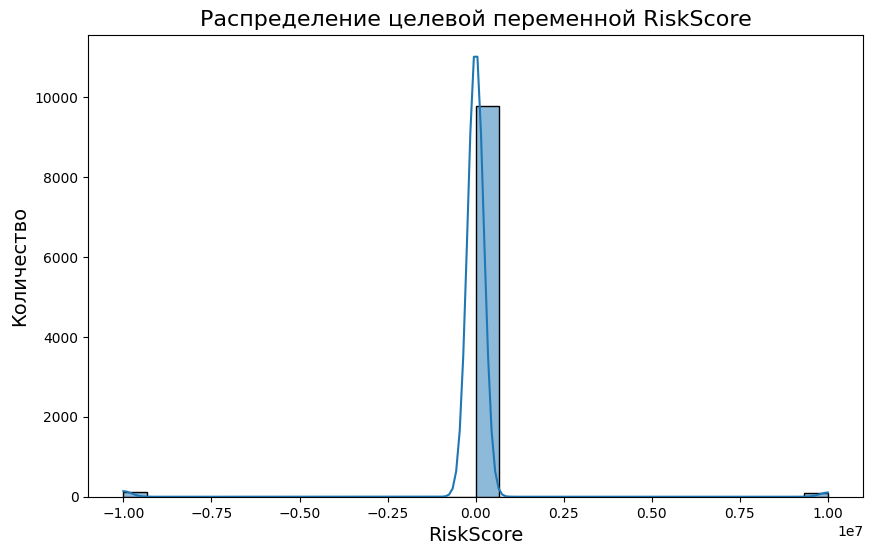

count    1.000000e+04
mean    -2.995269e+04
std      1.455787e+06
min     -9.999999e+06
25%      3.253485e+01
50%      4.409630e+01
75%      6.530486e+01
max      1.000000e+07
Name: RiskScore, dtype: float64


In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(train['RiskScore'], kde=True, bins=30)
plt.title('Распределение целевой переменной RiskScore', fontsize=16)
plt.xlabel('RiskScore', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show()
print(train['RiskScore'].describe())

Очень большие минимальные и максимальные значения (-9,999,999 и 10,000,000 соответственно) говорят о наличии выбросов. Среднее значение сильно отличается от медианы, что также указывает на наличие выбросов. Используем метод межквартильного размаха (IQR) для идентификации выбросов и их удаления (вычисляем первый и третий квартиль, определяем границы для выбросов и удаляем строки, где RiskScore выходит за пределы этих границ).

In [158]:
Q1 = train['RiskScore'].quantile(0.25)
Q3 = train['RiskScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_no_outliers = train[(train['RiskScore'] >= lower_bound) & (train['RiskScore'] <= upper_bound)]
print(f"Размер данных после удаления выбросов: {train_no_outliers.shape}")

Размер данных после удаления выбросов: (9788, 36)


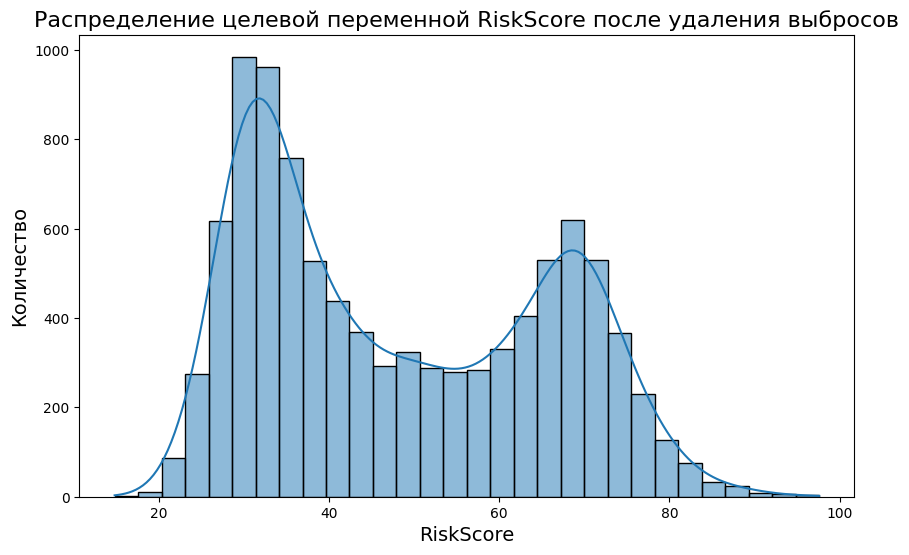

count    9788.000000
mean       48.325333
std        17.233659
min        14.841417
25%        32.717486
50%        44.180868
75%        65.090711
max        97.597249
Name: RiskScore, dtype: float64


In [159]:
plt.figure(figsize=(10, 6))
sns.histplot(train_no_outliers['RiskScore'], kde=True, bins=30)
plt.title('Распределение целевой переменной RiskScore после удаления выбросов', fontsize=16)
plt.xlabel('RiskScore', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show()
print(train_no_outliers['RiskScore'].describe())

Распределение RiskScore приблизилось к нормальному с медианой ~44.18 и средним ~48.33. Минимальное значение 14.84 и максимальное 97.60 показывают, что данные теперь находятся в разумных пределах.

**2.6.** Анализ и обработка числовых признаков

In [160]:
numeric_columns = train_no_outliers.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in ['RiskScore', 'LoanApproved']]
print("Все числовые признаки:", numeric_columns)


Все числовые признаки: ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio']


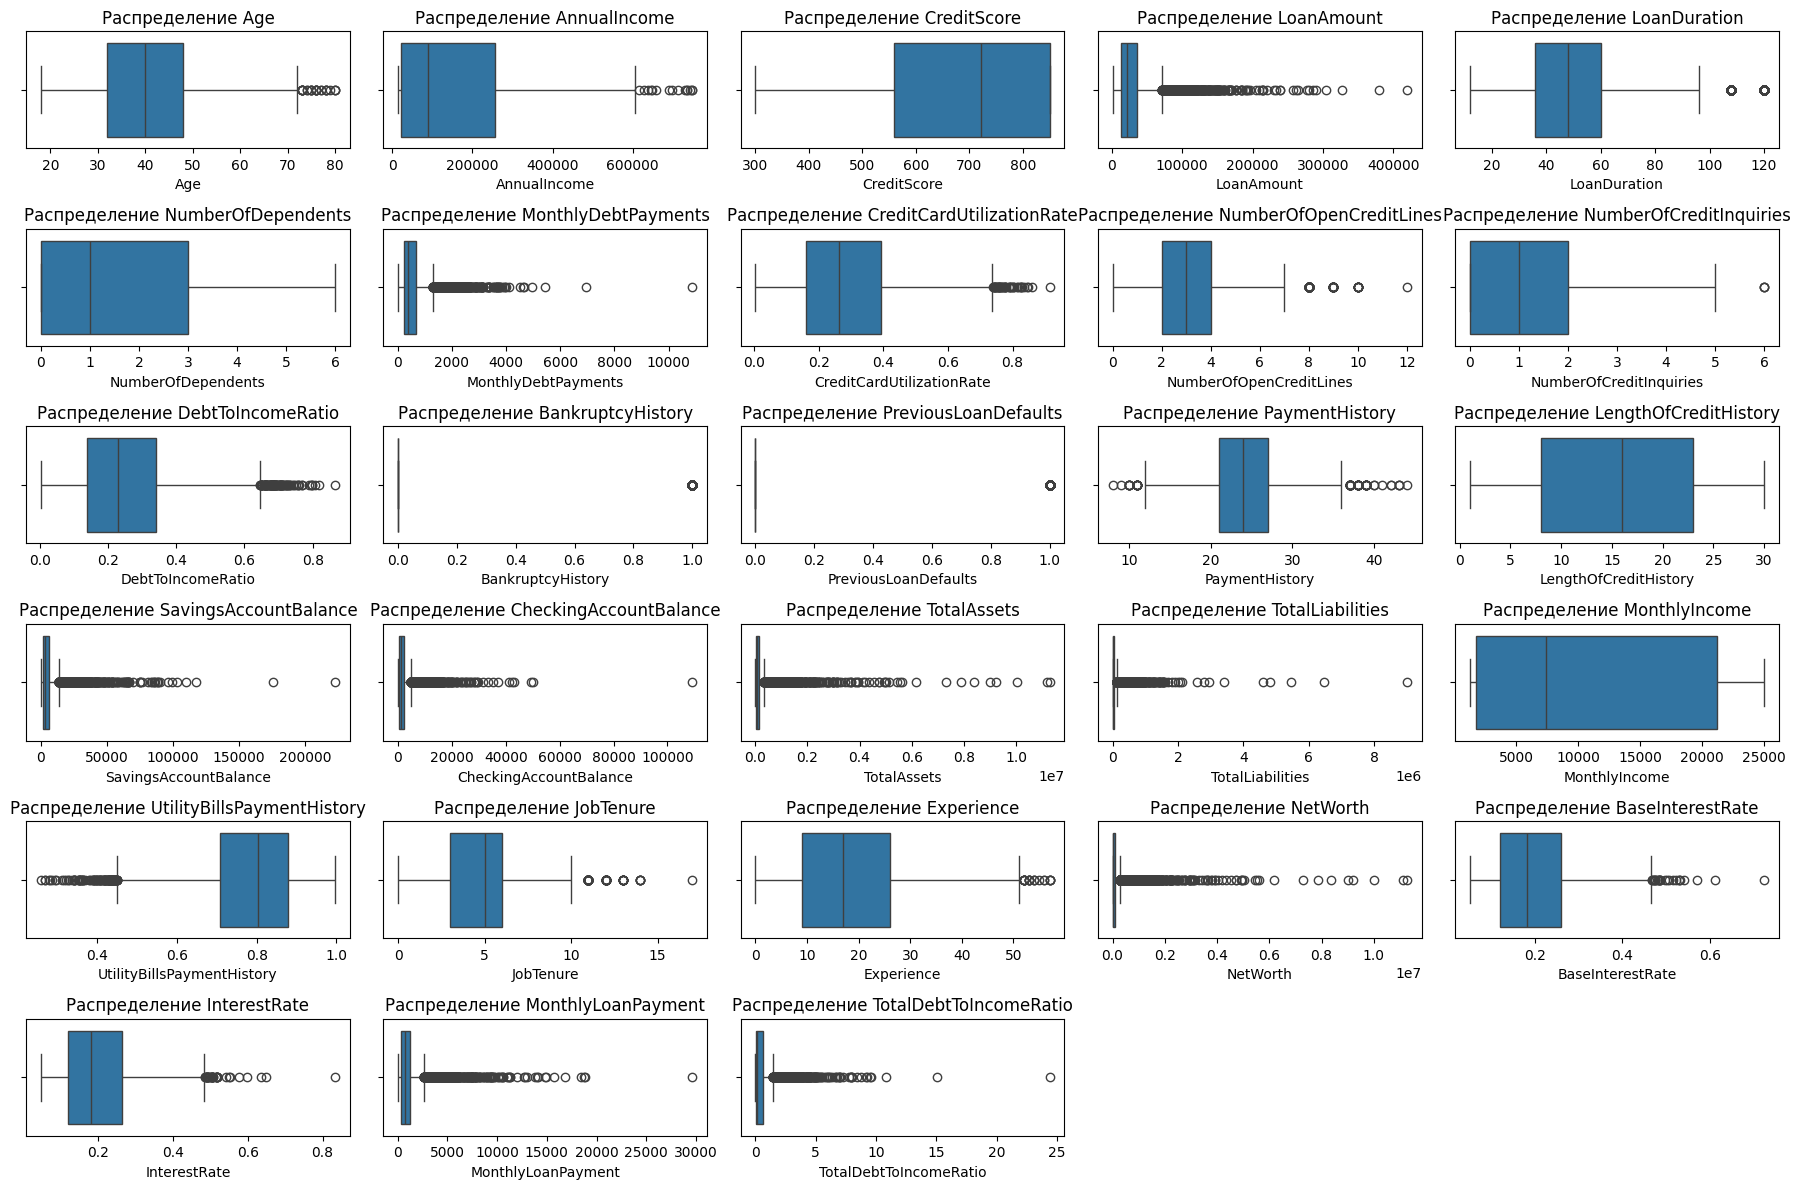

In [161]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x=train_no_outliers[col])
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

    AnnualIncome: Сильный перекос вправо.


Экстремальные выбросы:

    TotalLiabilities

    NetWorth

    TotalAssets

Выбросы нарушают линейность:

    CheckingAccountBalance

    SavingsAccountBalance

    TotalDebtToIncomeRatio

    MonthlyLoanPayment

    MonthlyDebtPayments

    LoanAmount

In [162]:
display(train_no_outliers[numeric_columns].describe())

outliers_count = {}
for col in numeric_columns:
    Q1 = train_no_outliers[col].quantile(0.05)
    Q3 = train_no_outliers[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_no_outliers[(train_no_outliers[col] < lower_bound) | (train_no_outliers[col] > upper_bound)]
    outliers_count[col] = len(outliers)

print("\nКоличество выбросов по признакам:")
for col, count in outliers_count.items():
    print(f"{col}: {count} выбросов ({count/len(train_no_outliers)*100:.2f}%)")

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
count,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,...,9.788000e+03,9788.000000,9788.000000,9788.000000,9788.000000,9.788000e+03,9788.000000,9788.000000,9788.000000,9788.000000
mean,39.853494,131612.620658,680.139150,29434.863200,53.366163,1.565591,539.993564,0.284525,3.031671,0.979669,...,6.912261e+04,10839.040228,0.784407,4.964957,17.629036,1.468540e+05,0.199408,0.199922,1072.769924,0.510995
std,11.585621,115782.168764,171.340022,26723.586716,24.463801,1.419078,492.550746,0.159119,1.738033,0.989624,...,2.073726e+05,9374.989392,0.123320,2.208064,11.313673,4.461655e+05,0.091974,0.096156,1308.978009,0.849410
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,7.800000e+01,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064
25%,32.000000,21243.000000,560.000000,13091.750000,36.000000,0.000000,242.000000,0.159146,2.000000,0.000000,...,7.948750e+03,1716.625000,0.707995,3.000000,9.000000,7.598250e+03,0.122219,0.119613,376.362920,0.066858
50%,40.000000,89606.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262768,3.000000,1.000000,...,2.259650e+04,7407.125000,0.804066,5.000000,17.000000,2.742950e+04,0.182023,0.180696,686.259663,0.178539
75%,48.000000,256547.000000,850.000000,36153.500000,60.000000,3.000000,664.250000,0.391275,4.000000,2.000000,...,5.959925e+04,21214.479167,0.879305,6.000000,26.000000,1.141288e+05,0.260252,0.264811,1281.502658,0.636773
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,8.997054e+06,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046



Количество выбросов по признакам:
Age: 0 выбросов (0.00%)
AnnualIncome: 6 выбросов (0.06%)
CreditScore: 0 выбросов (0.00%)
LoanAmount: 27 выбросов (0.28%)
LoanDuration: 0 выбросов (0.00%)
NumberOfDependents: 0 выбросов (0.00%)
MonthlyDebtPayments: 25 выбросов (0.26%)
CreditCardUtilizationRate: 0 выбросов (0.00%)
NumberOfOpenCreditLines: 0 выбросов (0.00%)
NumberOfCreditInquiries: 0 выбросов (0.00%)
DebtToIncomeRatio: 0 выбросов (0.00%)
BankruptcyHistory: 487 выбросов (4.98%)
PreviousLoanDefaults: 0 выбросов (0.00%)
PaymentHistory: 0 выбросов (0.00%)
LengthOfCreditHistory: 0 выбросов (0.00%)
SavingsAccountBalance: 69 выбросов (0.70%)
CheckingAccountBalance: 66 выбросов (0.67%)
TotalAssets: 114 выбросов (1.16%)
TotalLiabilities: 121 выбросов (1.24%)
MonthlyIncome: 0 выбросов (0.00%)
UtilityBillsPaymentHistory: 0 выбросов (0.00%)
JobTenure: 0 выбросов (0.00%)
Experience: 0 выбросов (0.00%)
NetWorth: 124 выбросов (1.27%)
BaseInterestRate: 0 выбросов (0.00%)
InterestRate: 0 выбросов (0.00%

Следовательно, надо обратботать выбросы минимум у 10 признаков (BankruptcyHistory не трогаем - это счетчик событий). Также проанализируем насколько распределение отклоняется от симметричности

TotalLiabilities              18.210638
NetWorth                      11.079291
TotalAssets                   10.735563
CheckingAccountBalance         9.399200
SavingsAccountBalance          6.656497
TotalDebtToIncomeRatio         6.012256
MonthlyLoanPayment             5.227502
BankruptcyHistory              4.141367
MonthlyDebtPayments            3.627297
LoanAmount                     3.407875
PreviousLoanDefaults           2.726194
NumberOfCreditInquiries        0.973715
InterestRate                   0.751451
NumberOfDependents             0.719332
BaseInterestRate               0.706551
DebtToIncomeRatio              0.697254
LoanDuration                   0.682346
AnnualIncome                   0.675452
NumberOfOpenCreditLines        0.585678
CreditCardUtilizationRate      0.580596
MonthlyIncome                  0.495399
JobTenure                      0.449500
Experience                     0.320957
PaymentHistory                 0.171560
Age                            0.171211


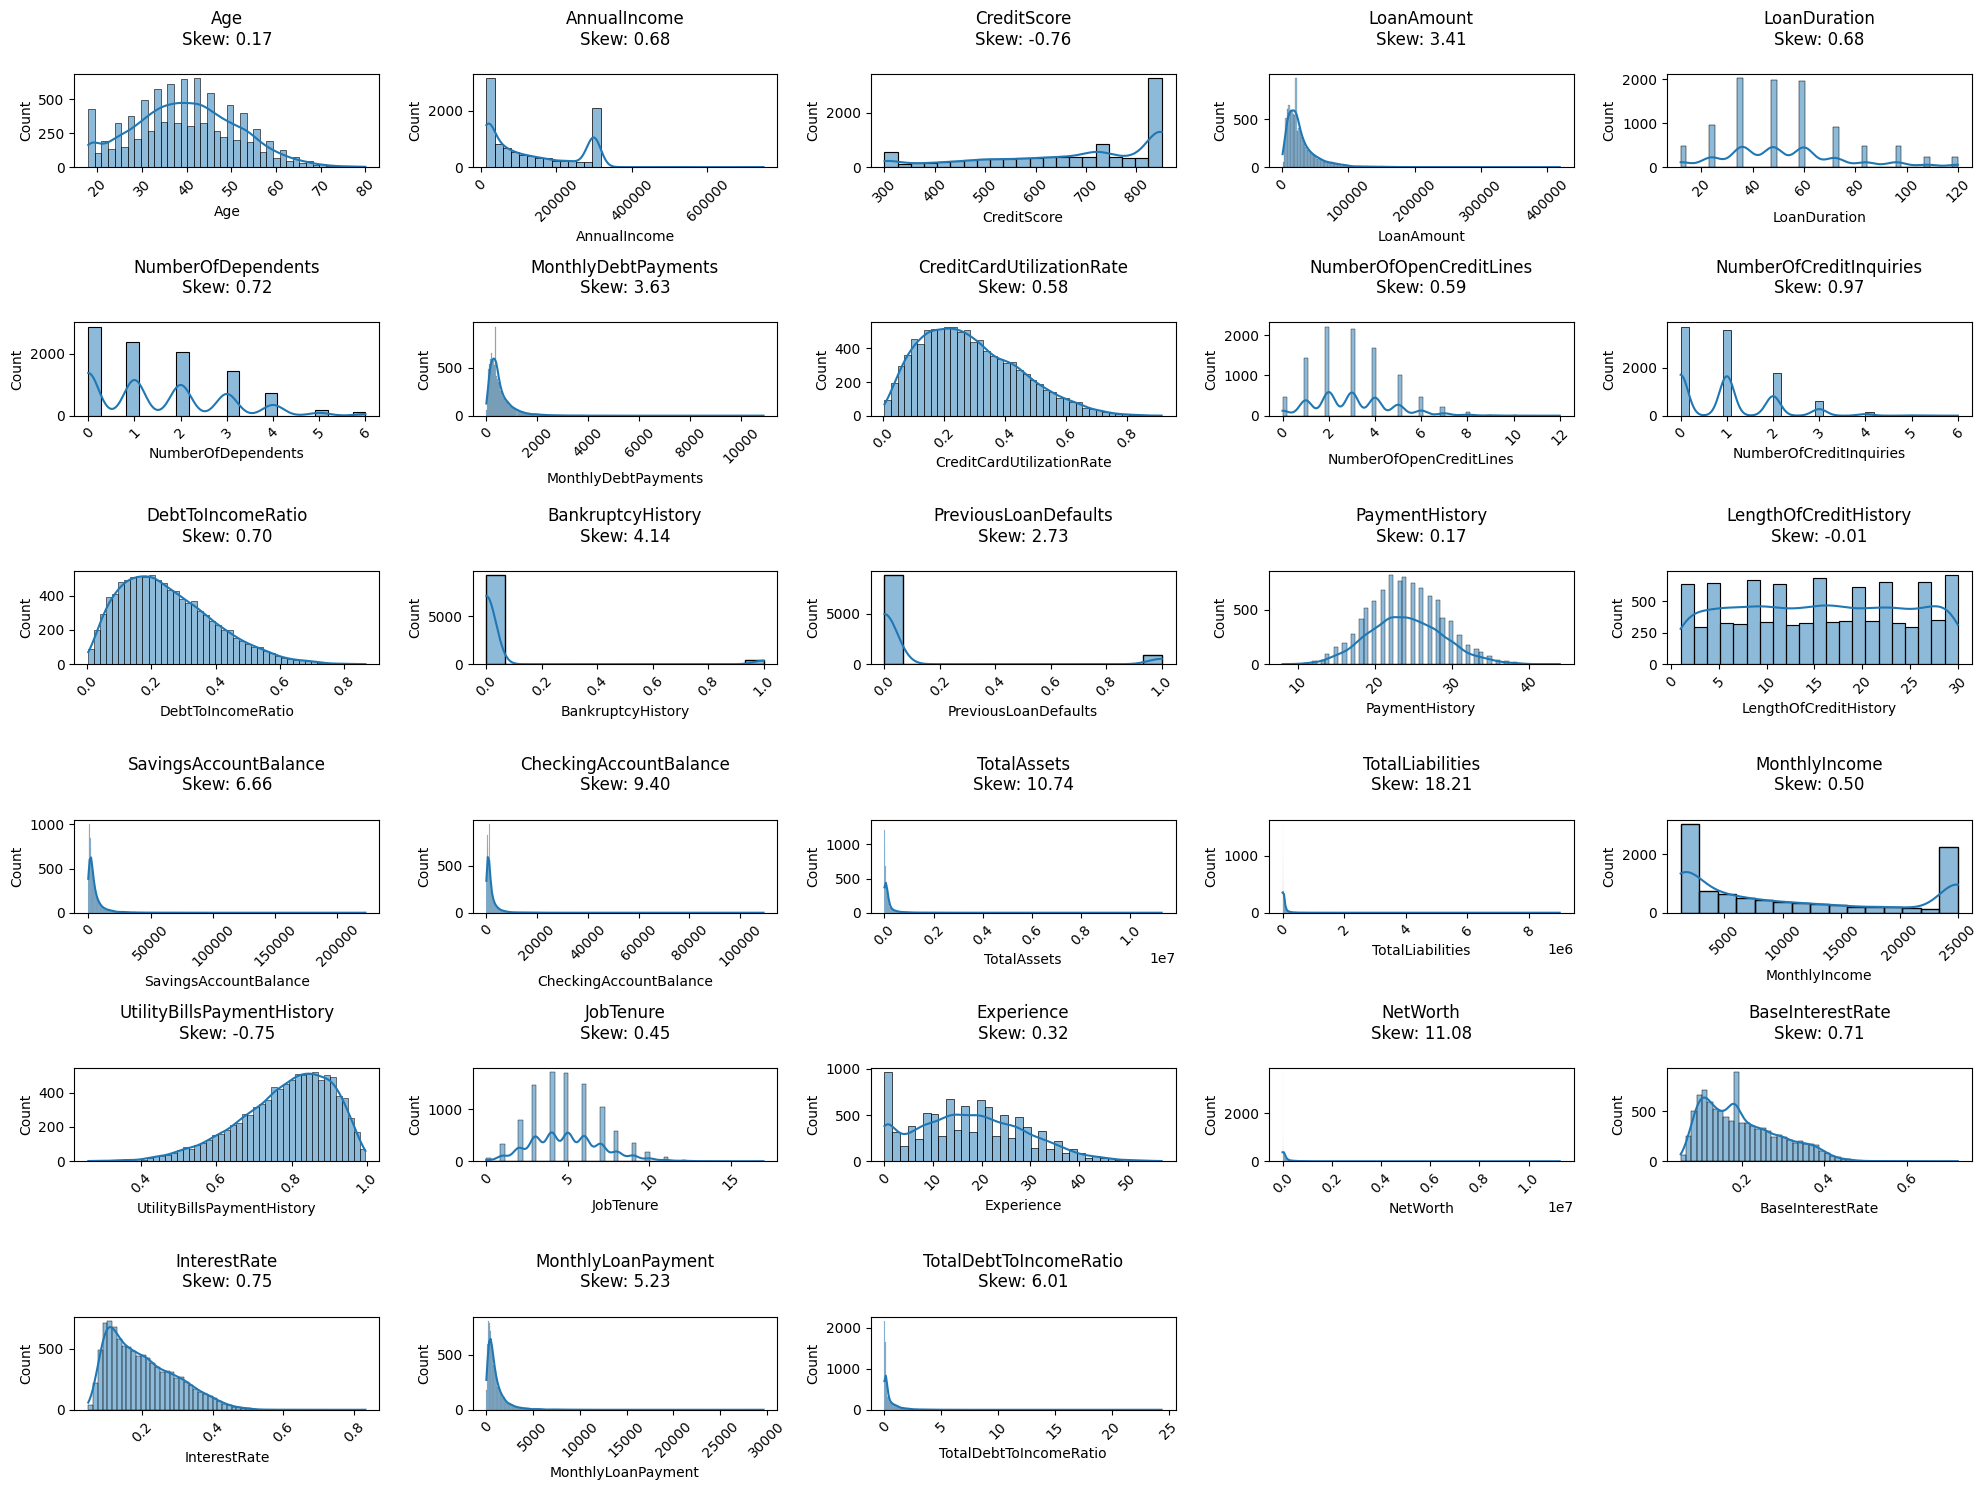

In [163]:
from scipy.stats import skew

skewness = train_no_outliers[numeric_columns].apply(skew).sort_values(ascending=False)

print(skewness)
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(6, 5, i)
    sns.histplot(train_no_outliers[col], kde=True)
    plt.title(f'{col}\nSkew: {skewness[col]:.2f}\n')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Признаки с высокой скошенностью (|skew| > 1):

    TotalLiabilities (18.21)

    NetWorth (11.08)

    TotalAssets (10.74)

    CheckingAccountBalance (9.40)

    SavingsAccountBalance (6.66)

    TotalDebtToIncomeRatio (6.01)

    MonthlyLoanPayment (5.23)

    BankruptcyHistory (4.14)

    MonthlyDebtPayments (3.63)

    LoanAmount (3.41)

In [164]:
import numpy as np

In [165]:
def winsorize_df(df, columns, lower_quantile=0.05, upper_quantile=0.95):
    df = df.copy()
    for col in columns:
        lower = df[col].quantile(lower_quantile)
        upper = df[col].quantile(upper_quantile)
        df[col] = df[col].clip(lower, upper)
    return df

columns_to_winsorize = [
    'AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments',
    'TotalAssets', 'NetWorth', 'MonthlyLoanPayment',
    'CheckingAccountBalance', 'SavingsAccountBalance',
    'TotalLiabilities', 'TotalDebtToIncomeRatio'
]

train_no_outliers = winsorize_df(train_no_outliers, columns_to_winsorize)
test = winsorize_df(test, columns_to_winsorize)

In [166]:
skewed_columns =  [
    'AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments',
    'TotalAssets', 'NetWorth', 'MonthlyLoanPayment',
    'CheckingAccountBalance', 'SavingsAccountBalance',
    'TotalLiabilities', 'TotalDebtToIncomeRatio'
]
for col in skewed_columns:
    train_no_outliers[col] = np.log1p(train_no_outliers[col])
    test[col] = np.log1p(test[col])

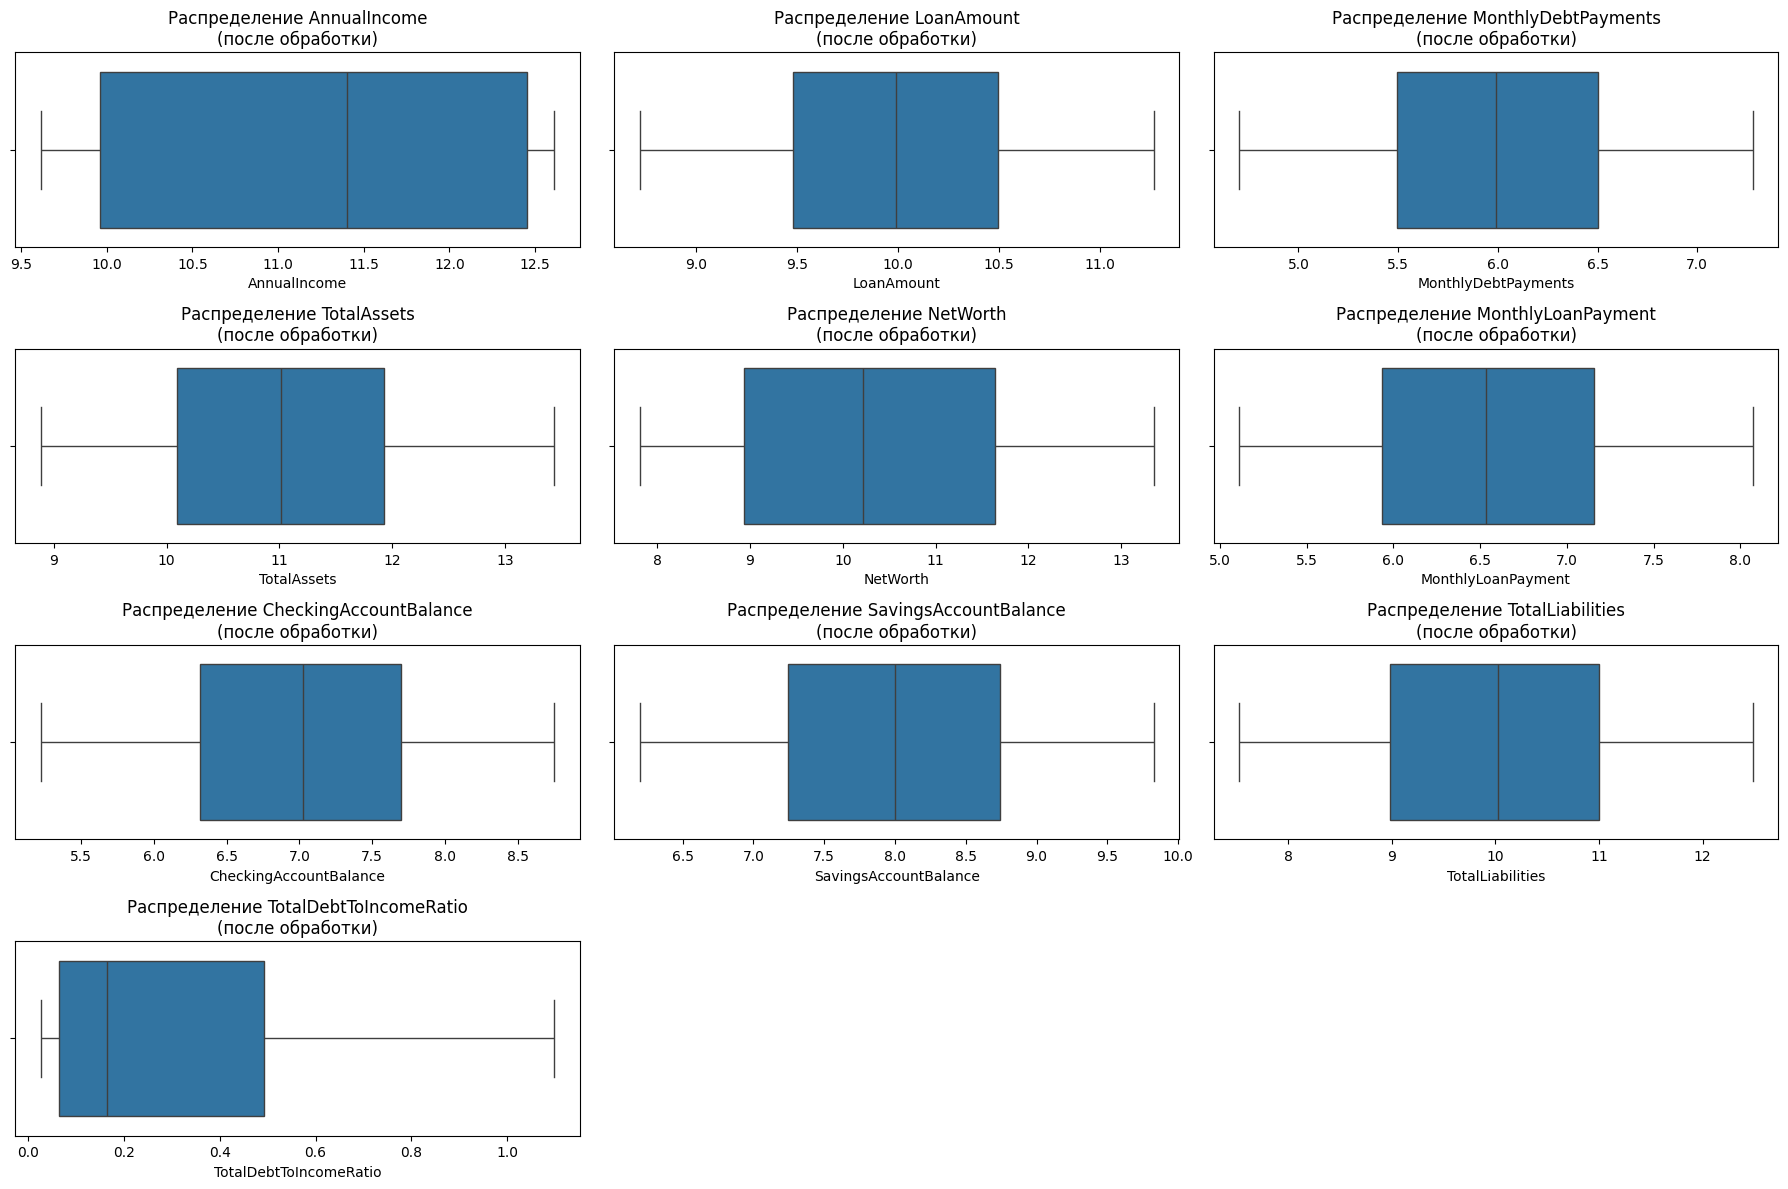

In [167]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(columns_to_winsorize, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=train_no_outliers[col])
    plt.title(f'Распределение {col}\n(после обработки)')
plt.tight_layout()
plt.show()

**2.7.** Анализ категориальных признаков

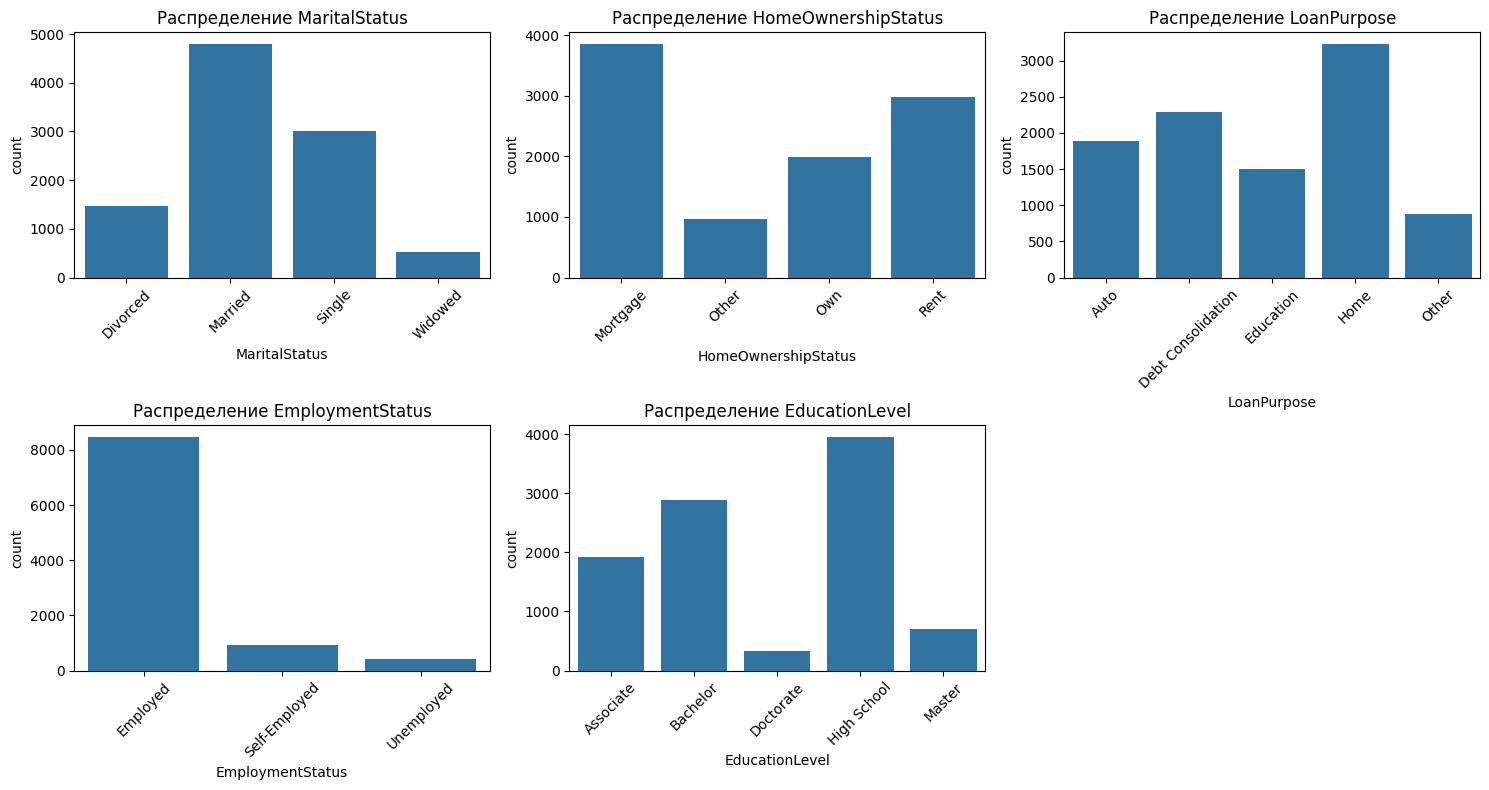

In [168]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=train_no_outliers)
    plt.title(f'Распределение {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  MaritalStatus: Доминируют Married и Single.

  HomeOwnership: Большинство имеют Mortgage или Rent.

  LoanPurpose: Наибольшая частота у категории "Home".

  EmploymentStatus: Наибольшая частота у категории "Employed".

  EducationLevel: Bachelor и High School - основные группы.

**2.8.** Преобразование категориальных признаков в числовые

Для работы с линейной регрессией необходимо преобразовать категориальные признаки в числовой формат. Используем метод One-Hot Encoding, который создает бинарные (0/1) столбцы для каждой категории.

In [169]:
train_encoded = pd.get_dummies(train_no_outliers, columns=categorical_columns, drop_first=True)
test_encoded = pd.get_dummies(test, columns=categorical_columns, drop_first=True)
missing_columns = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_columns:
    test_encoded[col] = 0
test_encoded = test_encoded[train_encoded.columns.drop('RiskScore')]
print("Размер train после кодирования:", train_encoded.shape)
print("Размер test после кодирования:", test_encoded.shape)

Размер train после кодирования: (9788, 47)
Размер test после кодирования: (5000, 46)


Все новые признаки имеют тип uint8

**2.9.** Матрица корреляций

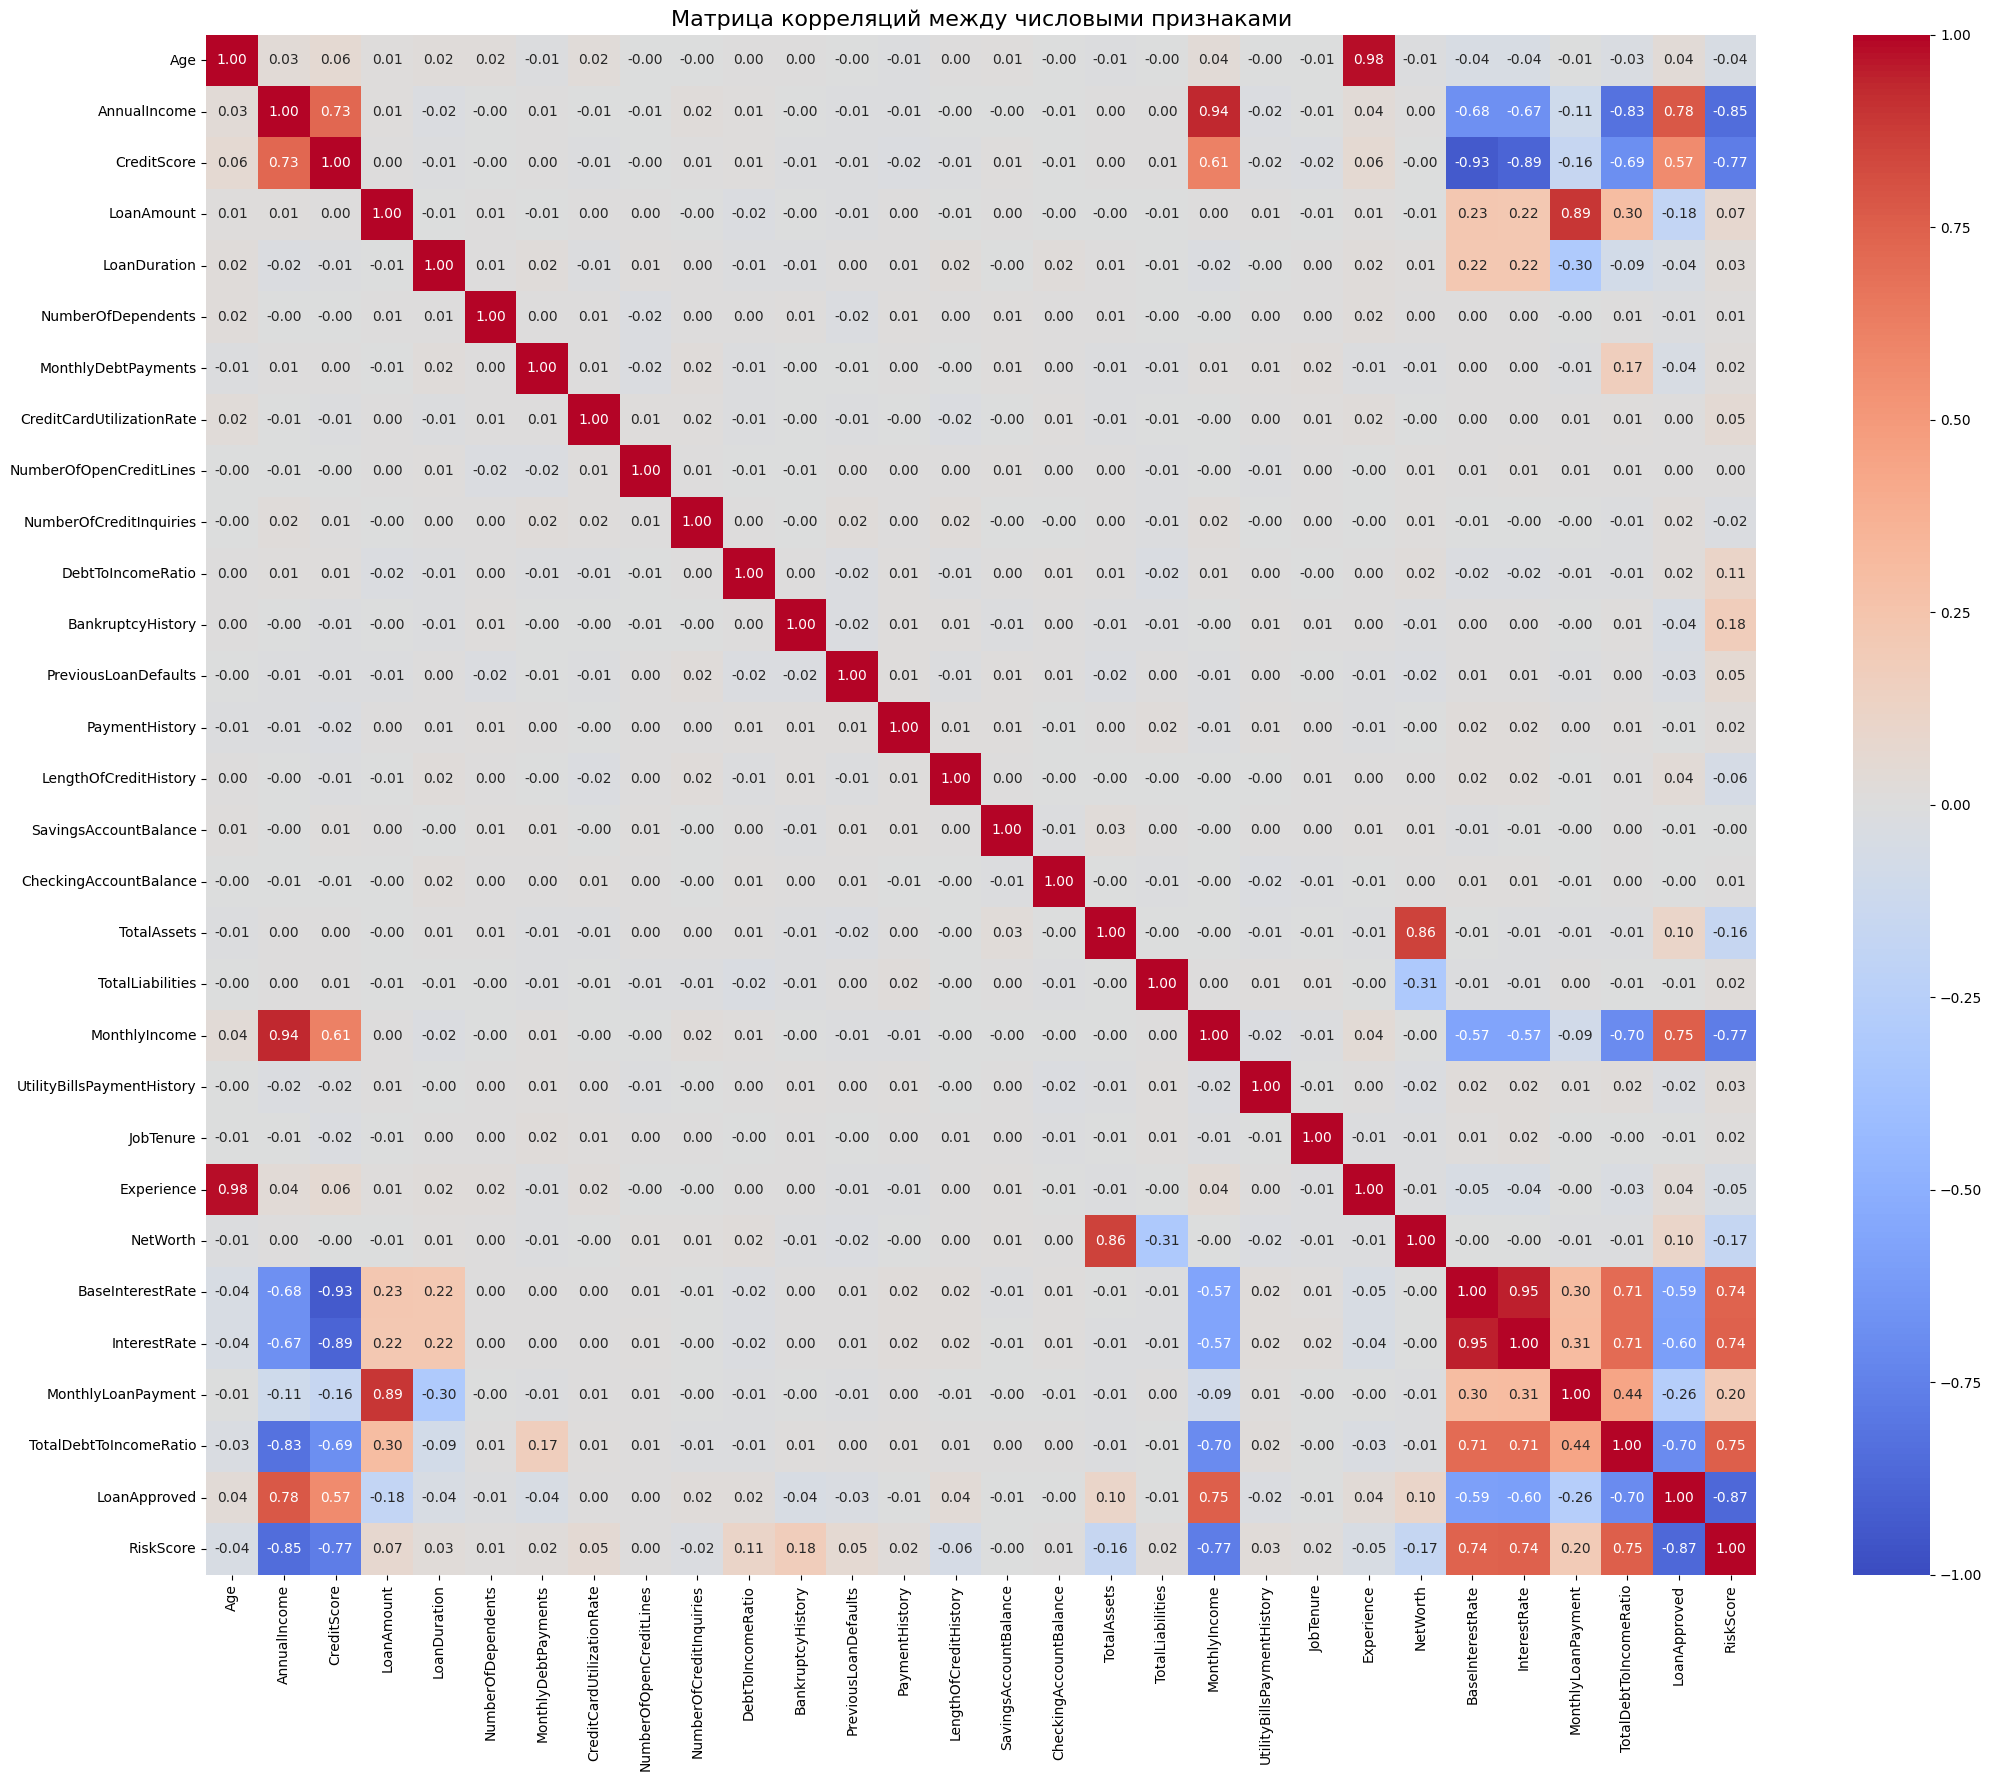

RiskScore                     1.000000
TotalDebtToIncomeRatio        0.754562
InterestRate                  0.743754
BaseInterestRate              0.741257
MonthlyLoanPayment            0.197025
BankruptcyHistory             0.175162
DebtToIncomeRatio             0.110157
LoanAmount                    0.074354
PreviousLoanDefaults          0.054791
CreditCardUtilizationRate     0.053632
LoanDuration                  0.028770
UtilityBillsPaymentHistory    0.025609
TotalLiabilities              0.018745
MonthlyDebtPayments           0.017550
PaymentHistory                0.016511
JobTenure                     0.015130
NumberOfDependents            0.008532
CheckingAccountBalance        0.005414
NumberOfOpenCreditLines       0.002193
SavingsAccountBalance        -0.002161
NumberOfCreditInquiries      -0.016526
Age                          -0.043591
Experience                   -0.045816
LengthOfCreditHistory        -0.060102
TotalAssets                  -0.163855
NetWorth                 

In [170]:
numeric_data = train_encoded.select_dtypes(include=['float64', 'int64', 'uint8'])
plt.figure(figsize=(25, 20))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Матрица корреляций между числовыми признаками", fontsize=16)
plt.show()
correlation_with_target = correlation_matrix['RiskScore'].sort_values(ascending=False)
print(correlation_with_target)

Топ-10 корреляций с RiskScore:
 LoanApproved              0.871497
AnnualIncome              0.845095
MonthlyIncome             0.769977
CreditScore               0.766001
TotalDebtToIncomeRatio    0.754562
InterestRate              0.743754
BaseInterestRate          0.741257
MonthlyLoanPayment        0.197025
BankruptcyHistory         0.175162
NetWorth                  0.165114
Name: RiskScore, dtype: float64


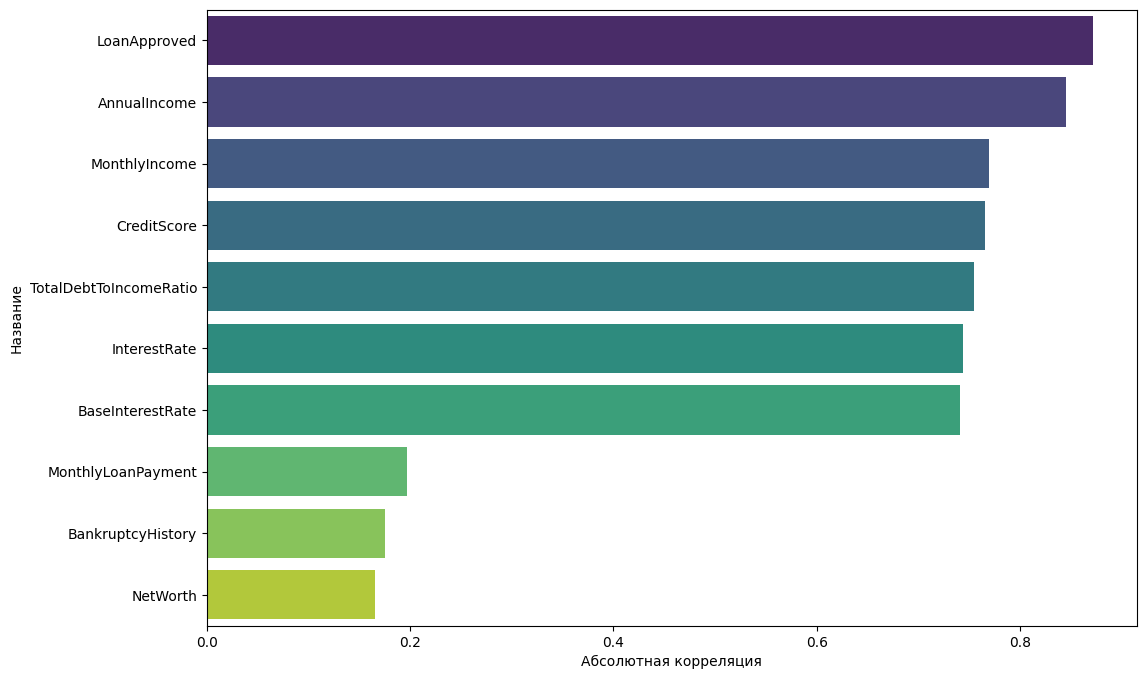

In [171]:
correlation_with_target_10 = numeric_data.corr()['RiskScore'].abs().sort_values(ascending=False).head(11)
correlation_with_target_10 = correlation_with_target_10.drop('RiskScore')
print("Топ-10 корреляций с RiskScore:\n", correlation_with_target_10)
plt.figure(figsize=(12, 8))
sns.barplot(
    x=correlation_with_target_10.values,
    y=correlation_with_target_10.index,
    hue=correlation_with_target_10.index,
    palette="viridis",
    legend=False,
    dodge=False
)
plt.xlabel("Абсолютная корреляция")
plt.ylabel("Название")
plt.show()

**3. Нормализация данных**

In [172]:
print("Тип данных ApplicationDate до преобразования:", train_encoded['ApplicationDate'].dtype)

if not pd.api.types.is_datetime64_any_dtype(train_encoded['ApplicationDate']):
    train_encoded['ApplicationDate'] = pd.to_datetime(train_encoded['ApplicationDate'])
    test_encoded['ApplicationDate'] = pd.to_datetime(test_encoded['ApplicationDate'])

train_encoded['ApplicationDate'] = (train_encoded['ApplicationDate'] - pd.Timestamp('1970-01-01')).dt.days
test_encoded['ApplicationDate'] = (test_encoded['ApplicationDate'] - pd.Timestamp('1970-01-01')).dt.days

print("Тип данных ApplicationDate после преобразования:", train_encoded['ApplicationDate'].dtype)

Тип данных ApplicationDate до преобразования: datetime64[ns]
Тип данных ApplicationDate после преобразования: int64


In [173]:
def z_score_normalize(data, mean=None, std=None):
    if mean is None or std is None:
        mean = data.mean()
        std = data.std()
        std = std.replace(0, 1)
    return (data - mean) / std, mean, std

def min_max_normalize(data, min_val=None, max_val=None):
    if min_val is None or max_val is None:
        min_val = data.min()
        max_val = data.max()
        max_val = max_val.where(max_val != min_val, min_val + 1)
    return (data - min_val) / (max_val - min_val), min_val, max_val

In [174]:
X = train_encoded.drop('RiskScore', axis=1)
y = train_encoded['RiskScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_columns = [col for col in X_train.columns
                  if col not in categorical_columns
                  and not col.startswith(('MaritalStatus_', 'HomeOwnershipStatus_',
                                        'LoanPurpose_', 'EmploymentStatus_', 'EducationLevel_'))]

X_train_z = X_train.copy()
X_test_z = X_test.copy()

X_train_z[numeric_columns], z_mean, z_std = z_score_normalize(X_train[numeric_columns])
X_test_z[numeric_columns] = z_score_normalize(X_test[numeric_columns], z_mean, z_std)[0]

X_train_mm = X_train.copy()
X_test_mm = X_test.copy()

X_train_mm[numeric_columns], mm_min, mm_max = min_max_normalize(X_train[numeric_columns])
X_test_mm[numeric_columns] = min_max_normalize(X_test[numeric_columns], mm_min, mm_max)[0]


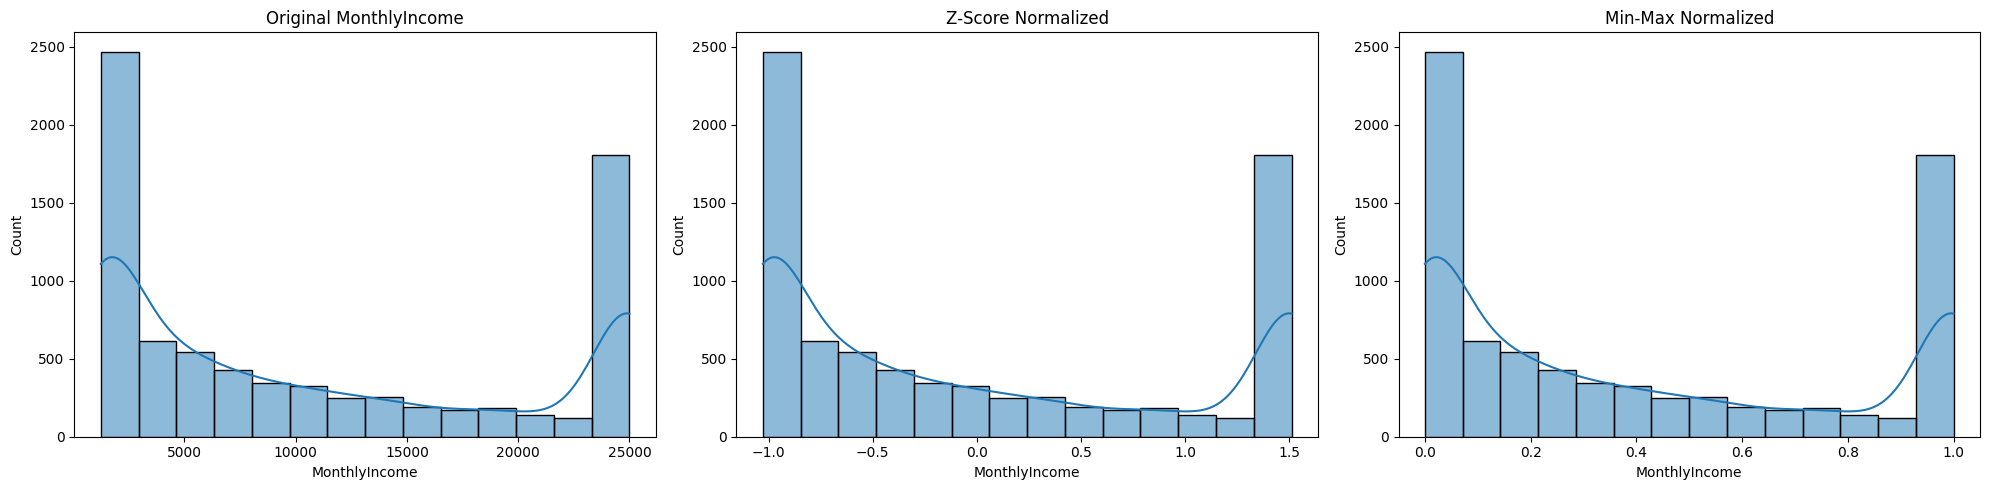


Оригинальные данные:
Среднее: 10861.86
Std: 9358.59

После Z-Score:
Среднее: -0.00
Std: 1.00

После Min-Max:
Min: 0.00
Max: 1.00


In [175]:
column_to_visualize = 'MonthlyIncome'

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(X_train[column_to_visualize], kde=True, ax=axes[0])
axes[0].set_title('Original ' + column_to_visualize)

sns.histplot(X_train_z[column_to_visualize], kde=True, ax=axes[1])
axes[1].set_title('Z-Score Normalized')

sns.histplot(X_train_mm[column_to_visualize], kde=True, ax=axes[2])
axes[2].set_title('Min-Max Normalized')

plt.tight_layout()
plt.show()

print("\nОригинальные данные:")
print(f"Среднее: {X_train[column_to_visualize].mean():.2f}")
print(f"Std: {X_train[column_to_visualize].std():.2f}")

print("\nПосле Z-Score:")
print(f"Среднее: {X_train_z[column_to_visualize].mean():.2f}")
print(f"Std: {X_train_z[column_to_visualize].std():.2f}")

print("\nПосле Min-Max:")
print(f"Min: {X_train_mm[column_to_visualize].min():.2f}")
print(f"Max: {X_train_mm[column_to_visualize].max():.2f}")

**4. Класс линейной регрессии**

**4.1.** Реализация

In [176]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [178]:
class LLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, method='analytical', learning_rate=0.01, n_iter=1000,
                 batch_size=1, random_state=None, tol=1e-4):
        self.method = method
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.random_state = random_state
        self.tol = tol

    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def fit(self, X, y):
        X, y = check_X_y(X, y, y_numeric=True)

        X = self._add_intercept(X)

        np.random.seed(self.random_state)
        self.theta = np.zeros(X.shape[1])

        self.loss_history_ = []

        if self.method == 'analytical':
            self.theta = np.linalg.pinv(X).dot(y)

        elif self.method == 'gradient':
            m = len(y)
            prev_loss = float('inf')

            for iteration in range(self.n_iter):
                predictions = X.dot(self.theta)
                errors = predictions - y

                gradient = X.T.dot(errors) / m

                self.theta -= self.learning_rate * gradient

                loss = np.mean(errors**2)
                self.loss_history_.append(loss)

                if iteration > 0 and abs(prev_loss - loss) < self.tol:
                    break
                prev_loss = loss

        elif self.method == 'stochastic':
            m = len(y)
            prev_loss = float('inf')

            for iteration in range(self.n_iter):
                indices = np.random.permutation(m)
                X_shuffled = X[indices]
                y_shuffled = y[indices]

                for i in range(0, m, self.batch_size):
                    X_batch = X_shuffled[i:i + self.batch_size]
                    y_batch = y_shuffled[i:i + self.batch_size]
                    batch_size = len(y_batch)

                    predictions = X_batch.dot(self.theta)
                    errors = predictions - y_batch

                    gradient = X_batch.T.dot(errors) / batch_size
                    self.theta -= self.learning_rate * gradient

                predictions = X.dot(self.theta)
                loss = np.mean((predictions - y)**2)
                self.loss_history_.append(loss)

                if iteration > 0 and abs(prev_loss - loss) < self.tol:
                    break
                prev_loss = loss

        else:
            raise ValueError(f"Неизвестный метод: {self.method}")

        self.is_fitted_ = True
        return self

    def predict(self, X):
        check_is_fitted(self, 'is_fitted_')
        X = check_array(X)
        X = self._add_intercept(X)
        return X.dot(self.theta)

    def get_coef(self):
        check_is_fitted(self, 'is_fitted_')
        return self.theta[1:]

    def get_intercept(self):
        check_is_fitted(self, 'is_fitted_')
        return self.theta[0]

**4.2.** Сравнение результатов с реализациями sklearn

In [179]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [181]:
X_train_scaled, z_mean, z_std = z_score_normalize(X_train)
lr_analytical = LLinearRegression(method='analytical')
lr_gradient = LLinearRegression(method='gradient', learning_rate=0.01, n_iter=5000)
lr_stochastic = LLinearRegression(method='stochastic', learning_rate=0.001, n_iter=1000, batch_size=32)

models = {
    '1 Analytical': lr_analytical,
    '2 Gradient': lr_gradient,
    '3 Stochastic': lr_stochastic,
    '4 Sklearn Analytical': SklearnLinearRegression(),
    '5 Sklearn SGD': SGDRegressor(max_iter=5000, tol=1e-6, penalty=None, eta0=0.01),
    '6 Sklearn Stochastic': SGDRegressor(max_iter=1000, penalty=None, eta0=0.001)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: MSE = {mse:.4f}")


1 Analytical (my z-score): MSE = 17.5342
2 Gradient (my z-score): MSE = 17.6075
3 Stochastic (my z-score): MSE = 17.5243
4 Sklearn Analytical: MSE = 17.5342
5 Sklearn SGD: MSE = 17.5425
6 Sklearn Stochastic: MSE = 17.5633


**5. Кросс-валидация k-fold и leave-one-out**

**5.1.** k-fold

In [ ]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import mean_squared_error
import numpy as np

# Подготовим данные (используем z-score нормализацию)
X_scaled, _, _ = z_score_normalize(X)
y = train_encoded['RiskScore']

# 5.1. Реализация K-Fold кросс-валидации
def k_fold_cross_validation(model, X, y, k=5, random_state=42):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Нормализуем данные для текущего фолда
        X_train_scaled, mean, std = z_score_normalize(X_train)
        X_test_scaled = z_score_normalize(X_test, mean, std)[0]

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    return np.mean(mse_scores), np.std(mse_scores)

# 5.2. Реализация Leave-One-Out кросс-валидации
def loo_cross_validation(model, X, y):
    loo = LeaveOneOut()
    mse_scores = []

    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Нормализуем данные для текущего фолда
        X_train_scaled, mean, std = z_score_normalize(X_train)
        X_test_scaled = z_score_normalize(X_test, mean, std)[0]

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    return np.mean(mse_scores), np.std(mse_scores)

# 5.3. Тестирование моделей с кросс-валидацией
models = {
    'Analytical': LLinearRegression(method='analytical'),
    'Gradient': LLinearRegression(method='gradient', learning_rate=0.01, n_iter=5000),
    'Stochastic': LLinearRegression(method='stochastic', learning_rate=0.001, n_iter=1000, batch_size=32),
    'Sklearn Linear': SklearnLinearRegression(),
    'Sklearn SGD': SGDRegressor(max_iter=5000, tol=1e-6, penalty=None, eta0=0.01)
}

print("Результаты кросс-валидации (k=5):")
print("{:<20} {:<15} {:<15}".format('Модель', 'Среднее MSE', 'Стд. отклонение'))
for name, model in models.items():
    mse_mean, mse_std = k_fold_cross_validation(model, X, y, k=5)
    print("{:<20} {:<15.4f} {:<15.4f}".format(name, mse_mean, mse_std))

# 5.4. Тестирование LOO для лучшей модели (так как LOO очень ресурсоемкий)
best_model_name = min(models.keys(), key=lambda x: k_fold_cross_validation(models[x], X, y)[0])
print(f"\nПроводим Leave-One-Out для лучшей модели ({best_model_name}):")
loo_mse, loo_std = loo_cross_validation(models[best_model_name], X, y)
print("LOO MSE: {:.4f} ± {:.4f}".format(loo_mse, loo_std))

Результаты кросс-валидации (k=5):
Модель               Среднее MSE     Стд. отклонение
Analytical           17.2499         0.2502         
Gradient             17.4721         0.2374         
Stochastic           17.3192         0.2463         
Sklearn Linear       17.2499         0.2502         
Sklearn SGD          17.4169         0.2075         

Проводим Leave-One-Out для лучшей модели (Sklearn Linear):


**5.2.** leave-one-out